In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import pandas as pd
import wfdb

from data_functions import load_data, plot_data


In [2]:
chunk_size = 10000
nb_files = 92

In [13]:
#Créer une base de donnée de tronçons de 10000 points

data = {}

i=0

for file in range(1,nb_files): 
    
    if file < 10:
        filename = "mimic/p090373/3058899_000"+str(file)
    else:
        filename = "mimic/p090373/3058899_00" + str(file)
    record = wfdb.rdrecord(filename) 
    
    if "RESP" in record.sig_name:
        ind = (record.sig_name).index("RESP")
        resp = record.p_signal[:,ind]
        nb_chunks = len(resp)/chunk_size
        for chunk in range(nb_chunks):
            print i
            if (resp[chunk_size*chunk : chunk_size*(chunk+1)]>=1.).any() or (resp[chunk_size*chunk : chunk_size*(chunk+1)]<=0).any():
                pass
            else:
                data["V"+str(i)] = resp[chunk_size*chunk : chunk_size*(chunk+1)]
                i = i + 1
    else: 
        pass
  

df = pd.DataFrame(data=data)
df.to_csv("mimic.csv", encoding='utf-8', index=False)

0
0
0
1
2
2
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
6
7
8
8
9
10
11
11
12
13
14
15
16
16
16
16
16
17
18
19
20
21
21
21
22
23
23
24
25
26
26
27
28
29
29
30
31
32
32
32
32
32
33
34
34
35
36
37
38
38
38
38
39
39
39
40
41
42
42
43
44
45
46
47
47
47
48
49
50
51
52
52
53
53
53
53
54
55
56
57
58
59
59
60
61
61
61
61
61
61
62
62
63
64
65
66
67
68
69
70
70
71
72
73
74
75
76
76
77
77
78
79
80
81
81
81
81
81
82
82
83
83
84
85
85
86
87
87
88
88
88
88
88
88
88
88
88
89
89
90
91
91
91
91
92
92
92
92
92
92
92
93
93
93
93
93
93
93
93
93
93
94
94
95
96
97
98
98
99
100
101
102
103
104
105
106
106
107
107
107
108
108
108
108
108
108
108
108
108
108
108
109
109
109
109
110
110
111
112
113
114
115
116
117
117
118
119
119
119
119
120
120
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
121
122
122
123
124
124
124
124
124
124
124
125
126
127
127
127
127
127
128
128
128
128
128
129
129
130
131
132
133
134
13

1130
1130
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1132
1132
1132
1132
1132
1133
1134
1135
1136
1137
1138
1139
1139
1140
1140
1140
1140
1140
1140
1140
1140
1140
1140
1140
1141
1141
1141
1142
1143
1144
1145
1146
1147
1148
1149
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1160
1160
1161
1161
1162
1163
1164
1164
1164
1165
1165
1165
1165
1165
1165
1165
1165
1165
1165
1165
1165
1165
1165
1165
1165
1165
1165
1165
1165
1165
1165
1165
1165
1165
1165
1165
1165
1165
1166
1166
1166
1167
1168
1169
1169
1169
1169
1170
1171
1171
1171
1171
1171
1171
1171
1171
1171
1171
1171
1171
1171
1172
1173
1173
1173
1173
1173
1173
1173
1173
1173
1173
1173


(10000, 1173)


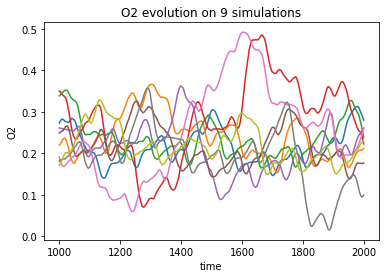

In [17]:
print df.shape
var = ['V'+str(i) for i in range(1,10)]
df1 = df[var][1000:2000]
plot_data(df1)

1


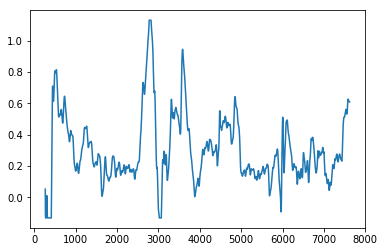

In [26]:

ind = (record.sig_name).index("RESP")
print 2*len(record.p_signal[:,ind])/chunk_size
plt.plot(record.p_signal[:,ind])


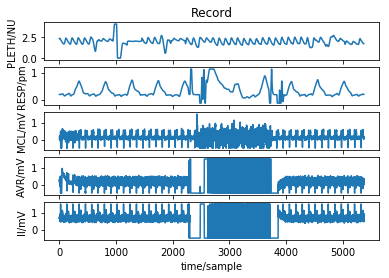

{'adc_gain': [1023.0, 3250.0, 2046.0, 2048.0, 2048.0],
 'adc_res': [12, 12, 12, 12, 12],
 'adc_zero': [2048, 2048, 2048, 2048, 2048],
 'base_counter': None,
 'base_date': None,
 'base_time': '10:02:44.149',
 'baseline': [0, 423, 1024, 1023, 1023],
 'block_size': [0, 0, 0, 0, 0],
 'byte_offset': [None, None, None, None, None],
 'checksum': [-28037, 5757, 15137, 29329, 16136],
 'comments': [],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['3058899_0011.dat',
  '3058899_0011.dat',
  '3058899_0011.dat',
  '3058899_0011.dat',
  '3058899_0011.dat'],
 'fmt': ['16', '16', '16', '16', '16'],
 'fs': 125,
 'init_value': [2348, 1042, 1126, 1525, 2405],
 'n_sig': 5,
 'p_signal': array([[ 2.29521017,  0.19046154,  0.04985337,  0.24511719,  0.67480469],
        [ 2.30498534,  0.19076923,  0.14467253,  0.18017578,  0.73486328],
        [ 2.31573803,  0.19138462,  0.17497556,  0.31982422,  0.63476562],
        ...,
        [ 1.71652004,  0.19723077, 

In [26]:
record = wfdb.rdrecord("p090373/3058899_0011")#p090373/3058899_0001") 

wfdb.plot_wfdb(record=record, title='Record') 
display(record.__dict__)
